Logistic regression is a one layer neural network (a neural network without hidden layer). 

<img src="logistic_regression_schematic.png" style = "width = 500px; height = 300px "/>
Figure from: https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Load dataset iris.

In [92]:
iris = datasets.load_iris()

Logistic regression can handle high dimensional input. For ease of visualization, only first two columns of iris data are utilized as input X.

In [93]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

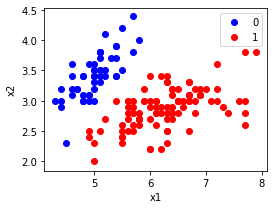

In [94]:
plt.figure(figsize=(4, 3))
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

If fit_intercept is set to True, 1 and w0 will be added in the model's input layer. If not, input layer only has x1, x2, ..., xm, it will force the intercept to the origin (0, 0).

In [95]:
class myLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr  # learning rate
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        #weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            #forward propagation
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            #calculate the gradient from h-y
            gradient = np.dot(X.T, (h - y)) / y.size
            
            #update weights using gradient and learning rate
            self.theta -= self.lr * gradient
            
            #update the prediction h, and calculate the loss with latest weights
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            
            #if verbose is True, display training info    
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} at {i} iteration\t')
                
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

First example, set fit_intercept to False, the intercept is forced to the origin (0, 0).

In [96]:
model = myLogisticRegression(lr=0.1, num_iter=300000, fit_intercept=False, verbose=True)

Train the model

In [97]:
%time model.fit(X, y)

loss: 0.6101032138557548 at 0 iteration	
loss: 0.04027479413306975 at 10000 iteration	
loss: 0.03752536539293344 at 20000 iteration	
loss: 0.03682515335233887 at 30000 iteration	
loss: 0.03657287068665997 at 40000 iteration	
loss: 0.03646728566103664 at 50000 iteration	
loss: 0.03641934425132845 at 60000 iteration	
loss: 0.03639647392531465 at 70000 iteration	
loss: 0.03638521076604689 at 80000 iteration	
loss: 0.03637954438333342 at 90000 iteration	
loss: 0.03637665165535654 at 100000 iteration	
loss: 0.03637515972788773 at 110000 iteration	
loss: 0.0363743846884681 at 120000 iteration	
loss: 0.036373979987784695 at 130000 iteration	
loss: 0.03637376788568445 at 140000 iteration	
loss: 0.03637365642852612 at 150000 iteration	
loss: 0.0363735977468665 at 160000 iteration	
loss: 0.036373566808442725 at 170000 iteration	
loss: 0.03637355048056884 at 180000 iteration	
loss: 0.036373541857198044 at 190000 iteration	
loss: 0.036373537300462534 at 200000 iteration	
loss: 0.03637353489168247 

In [98]:
preds = model.predict(X)
(preds == y).mean()

0.9933333333333333

Because intercept is set to False, weights only contain w1 and w2.

In [99]:
model.theta

array([  7.52982954, -13.13052892])

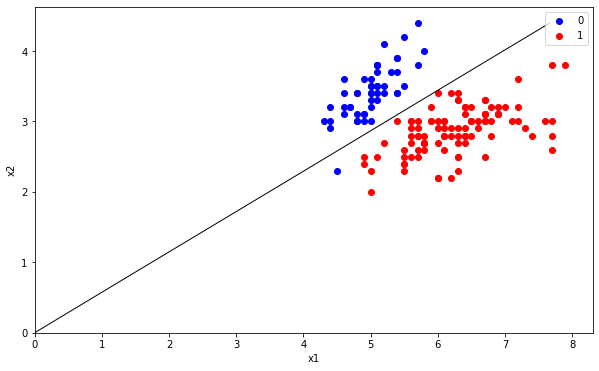

In [100]:
plt.figure(figsize=(10, 6))
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
#xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
xx1, xx2 = np.meshgrid(np.linspace(0, x1_max), np.linspace(0, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')

Second example, set fit_intercept to True, the intercept is NOT forced to the origin (0, 0).

In [101]:
model = myLogisticRegression(lr=0.1, num_iter=300000, fit_intercept=True, verbose=True)

In [102]:
%time model.fit(X, y)

loss: 0.6106904453410645 at 0 iteration	
loss: 0.03432718644226483 at 10000 iteration	
loss: 0.028786652134558176 at 20000 iteration	
loss: 0.025718548517683595 at 30000 iteration	
loss: 0.02340842758463659 at 40000 iteration	
loss: 0.021507024522720526 at 50000 iteration	
loss: 0.019892368181604832 at 60000 iteration	
loss: 0.01850316644094788 at 70000 iteration	
loss: 0.01729919359204133 at 80000 iteration	
loss: 0.016249738703587736 at 90000 iteration	
loss: 0.015329838490314565 at 100000 iteration	
loss: 0.014518833591009708 at 110000 iteration	
loss: 0.013799605037762763 at 120000 iteration	
loss: 0.013158006956155592 at 130000 iteration	
loss: 0.012582374964505361 at 140000 iteration	
loss: 0.012063092454345658 at 150000 iteration	
loss: 0.011592216936374881 at 160000 iteration	
loss: 0.01116316678090666 at 170000 iteration	
loss: 0.010770464048285666 at 180000 iteration	
loss: 0.010409526276509746 at 190000 iteration	
loss: 0.01007649925054516 at 200000 iteration	
loss: 0.009768

In [103]:
preds = model.predict(X)
(preds == y).mean()

1.0

Intercept is set to True, weights contain w0, w1 and w2.

In [104]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

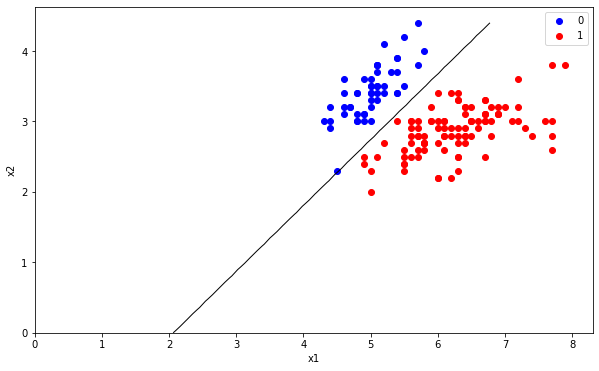

In [105]:
plt.figure(figsize=(10, 6))
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
#xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
xx1, xx2 = np.meshgrid(np.linspace(0, x1_max), np.linspace(0, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')

In [106]:
import seaborn as sns
import pandas as pd
import sys
import os
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

col=['sepal_length','sepal_width','petal_length','petal_width','type']

# convert a Scikit-learn dataset to a Pandas dataset
iris=datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [107]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [108]:
y = (iris.target != 0) * 1
df['type'] = y

df_name=df.columns

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [109]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.666667
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


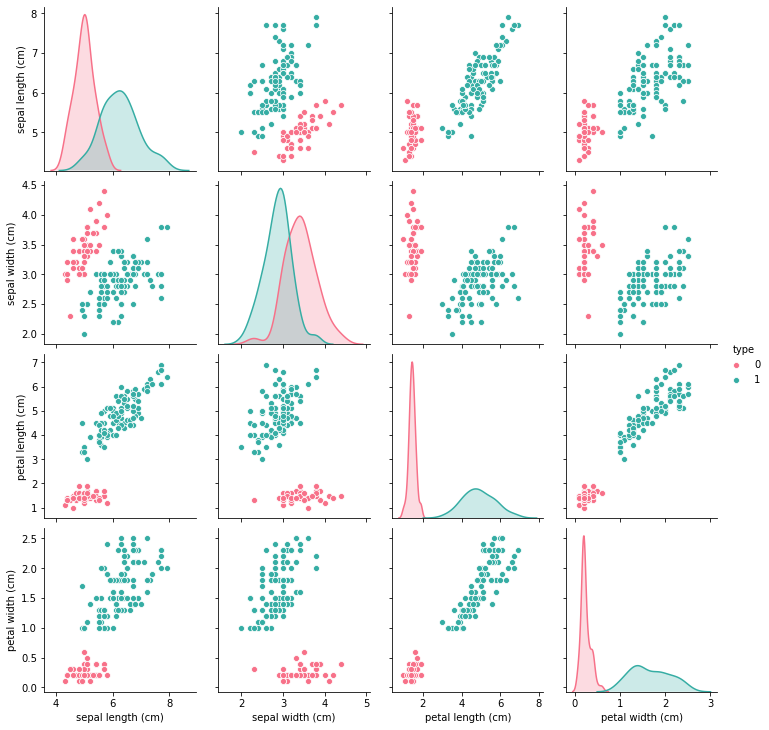

In [110]:
g = sns.pairplot(df, hue="type", palette="husl")

In [111]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5
    
    '''

    trace1 = go.Histogram(
        x=data_array,
        histnorm='count',
        name=nameOfFeature,
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )
    '''
    trace1 = go.Histogram(
        x = data_array,
        name = nameOfFeature,
        autobinx = False)

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [112]:
plotHist(df,'sepal length (cm)')

In [113]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [114]:
plotBarCat(df,df_name[0],'type')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
type mean :  0.6666666666666666
type var  :  0.22222222222222224
type skew :  -0.7071067811865475
type kurt :  -1.5
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [115]:
plotBarCat(df,df_name[1],'type')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
type mean :  0.6666666666666666
type var  :  0.22222222222222224
type skew :  -0.7071067811865475
type kurt :  -1.5
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [116]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [117]:
PlotPie(df, 'type')

In [121]:
model = myLogisticRegression(lr=0.1, num_iter=30000, fit_intercept=True, verbose=True)

In [124]:
X =  df[df_name[0:4]]
Y = df[df_name[4]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['type'])

In [125]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
5,5.4,3.9,1.7,0.4
71,6.1,2.8,4.0,1.3
45,4.8,3.0,1.4,0.3
37,4.9,3.6,1.4,0.1
38,4.4,3.0,1.3,0.2


In [126]:
y_train.head()

5     0
71    1
45    0
37    0
38    0
Name: type, dtype: int32

In [127]:
%time model.fit(X_train, y_train)

loss: 0.5477663402868256 at 0 iteration	
loss: 0.0009636554255234368 at 10000 iteration	
loss: 0.0005186453181938458 at 20000 iteration	
Wall time: 32.4 s


In [128]:
preds = model.predict(X_test)
(preds == y_test).mean()

1.0

In [129]:
model.theta

array([-0.58353964, -1.0024675 , -3.19801129,  5.18946069,  2.40881355])